### Aprendizaje Automatico
### Maria Araceli Diaz Cumplido 

# Campaña "Seguro Vivienda" de compañía financiera

Los correos a todos los potenciales clientes de un producto no son una estrategia de marketing efectiva, ya que muchos de ellos no están interesados. Identificando a los más propensos a contratar el producto se podría dirigir la campaña de marketing con mayor precisión y reducir su coste.

La compañía financiera ofrece seguros, créditos, etc. y nos proporciona un listado de clientes a los que ha dirigido una campaña de marketing ofreciendo el nuevo producto “Seguro Vivienda”. En el fichero se encuentran los datos de dichos clientes, así como información de otros productos ya contratados y si contrataron el nuevo producto o no. También se dispone de un fichero con información sociodemográfica asociada a diferentes zonas de residencia.

Se pide que planifiquemos una campaña más efectiva sobre un segundo conjunto de clientes, para lo que utilizaremos el primer conjunto para construir modelos predictivos que usaremos sobre el segundo conjunto para seleccionar los clientes más propensos a contratar el producto. Una vez seleccionados los candidatos, la compañía les ofrecerá el producto y medirá la eficacia del modelo según la proporción de ellos que lo contratan.

## Conjuntos de datos

### Clientes

* ID_Cliente: identificador único del cliente
* Fecha_Nacimiento: fecha de nacimiento del cliente
* Fecha_Alta: fecha de alta del cliente
* Sexo: sexo del cliente
* ID_Zona: identificador único de zona de residencia
* Productos_X: número de productos contratados por tipo
* Gasto_X: gasto anual en los distintos productos
* Seguro_Vivienda: el cliente contrató el producto ofrecido o no

### Zonas

* ID_Zona: identificador único de zona
* Tipo_X: porcentaje de población por tipología familiar
* Educacion_X: porcentaje de población por nivel de estudios
* Poblacion_X: porcentaje de población por tipo de población
* Vivienda_X: porcentaje de población por tipo de vivienda
* Medico_X: porcentaje de población por tipo de seguro médico
* Ingresos_X: porcentaje de población por nivel de ingresos

## Cruce de datos

Primero vamos a cruzar los datos de clientes con los datos de zonas, para tener toda la información en una sola tabla por cada cliente. En el siguiente código, deberás introducir en la variable 'datos_path' la ruta a la carpeta donde se encuentran los ficheros de datos, por ejemplo "~/Escritorio" si están en el escritorio.

In [1]:
datos_path ='' 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import os

%matplotlib inline

clientes_file = "Clientes_train.csv"
zonas_file = "Zonas.csv"

clientes = pd.read_csv(os.path.join(datos_path, clientes_file), sep='\t')
zonas = pd.read_csv(os.path.join(datos_path, zonas_file), sep='\t')

datos = pd.merge(clientes, zonas, on="ID_Zona", how="inner")

targets = datos["Seguro_Vivienda"]
variables = datos.drop(["Seguro_Vivienda"], axis=1, inplace=False)

## Estudio de datos

Hacemos un estudio de los datos con el objetivo de comprenderlos y encontrar en ellos posibles anomalías. Empezamos por una inspección visual de una muestra de filas de la tabla:

In [3]:
variables.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.0,617.55,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
1,C3441,01/05/1962,26/12/1984,Hombre,Z1143,0,0,0,0.0,0.00,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
2,C0412,19/01/1967,29/04/1987,Hombre,Z1143,0,0,1,0.0,0.00,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
3,C3565,20/04/1948,06/09/1969,Hombre,Z1143,0,1,0,0.0,3315.54,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
4,C0315,28/07/1979,18/06/2001,Mujer,Z1143,0,1,2,0.0,2561.45,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3


In [4]:
targets.head()

0    False
1    False
2    False
3    False
4    False
Name: Seguro_Vivienda, dtype: bool

 Seguimos con un estudio de estadísticos básicos que nos indiquen el rango de valores de cada variable (columna) numérica:

In [5]:
variables.describe()

,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,0.080287,0.750940,1.066279,37.133915,1583.312689,273.471145,47.392026,34.010779,18.597458,14.136502,...,29.345565,22.355572,26.771343,54.007017,45.992983,27.863485,72.136515,1.449713,6.700150,91.850126
std,0.365148,0.795887,1.001220,289.125502,2008.636888,741.281246,24.955844,20.001426,20.498031,18.661422,...,21.739949,20.322406,21.439939,37.375465,37.375465,24.390093,24.390093,5.362351,12.187754,14.078293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.410000,19.980000,0.000000,0.000000,...,15.230000,3.880000,9.420000,14.900000,8.175000,7.275000,56.530000,0.000000,0.000000,90.120000
50%,0.000000,1.000000,1.000000,0.000000,649.610000,117.630000,48.180000,32.140000,14.350000,6.440000,...,27.480000,19.550000,22.220000,58.410000,41.590000,20.570000,79.430000,0.000000,0.000000,99.990000
75%,0.000000,1.000000,2.000000,0.000000,2948.910000,303.705000,65.450000,44.705000,30.530000,20.700000,...,41.150000,33.700000,41.020000,91.825000,85.100000,43.470000,92.725000,0.000000,8.325000,100.000000
max,4.000000,10.000000,7.000000,4934.590000,16735.670000,17188.620000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.010000


In [6]:
targets.describe()

count      2927
unique        2
top       False
freq       2762
Name: Seguro_Vivienda, dtype: object

Podemos obtener detalles adicionales de cada variable individualmente:

In [7]:
variables["Gasto_Vehiculos"].median()

649.61

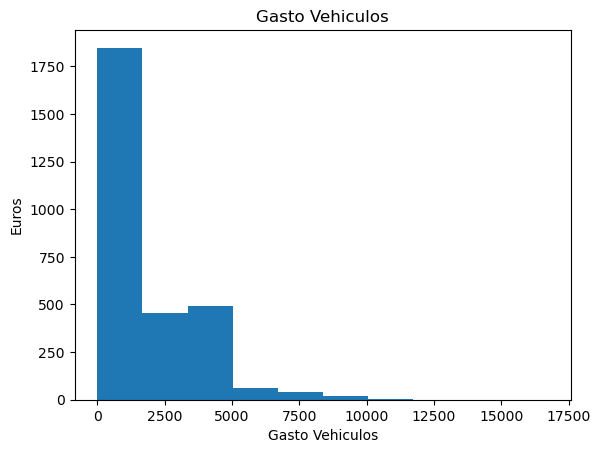

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(datos["Gasto_Vehiculos"], bins = 10, range = (datos["Gasto_Vehiculos"].min(), datos["Gasto_Vehiculos"].max()))
plt.title("Gasto Vehiculos")
plt.xlabel("Gasto Vehiculos")
plt.ylabel("Euros")
plt.show()

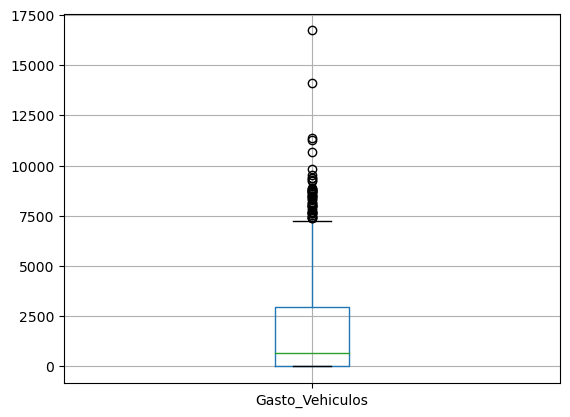

In [9]:
variables.boxplot(column="Gasto_Vehiculos")
plt.show()

También podemos obtener información de variables categóricas:

In [10]:
variables["Sexo"].unique()

array(['Mujer', 'Hombre'], dtype=object)

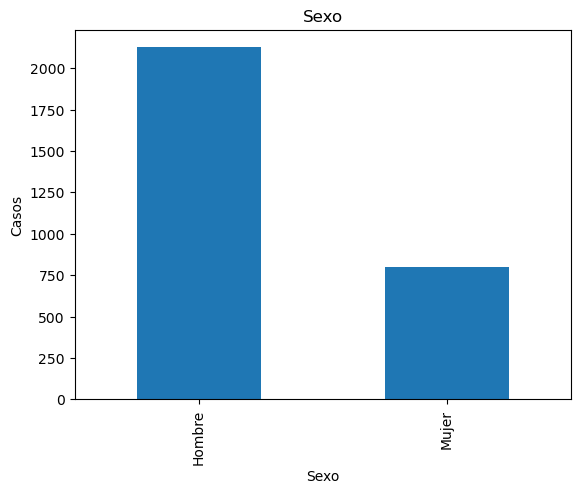

In [11]:
ax = variables["Sexo"].value_counts().plot(kind="bar")
plt.title("Sexo")
plt.xlabel("Sexo")
plt.ylabel("Casos")
plt.show()

<Axes: xlabel='Sexo'>

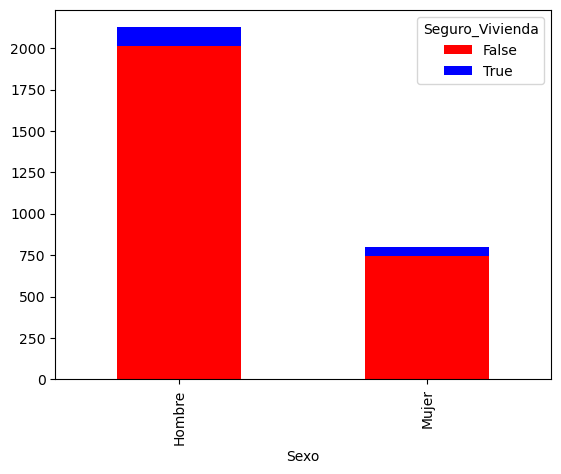

In [12]:
tmp = pd.crosstab([datos.Sexo], datos.Seguro_Vivienda)
tmp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [13]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 0 to 2926
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID_Cliente                           2927 non-null   object 
 1   Fecha_Nacimiento                     2927 non-null   object 
 2   Fecha_Alta                           2927 non-null   object 
 3   Sexo                                 2927 non-null   object 
 4   ID_Zona                              2927 non-null   object 
 5   Productos_Vida                       2927 non-null   int64  
 6   Productos_Vehiculos                  2927 non-null   int64  
 7   Productos_Otros                      2927 non-null   int64  
 8   Gasto_Vida                           2927 non-null   float64
 9   Gasto_Vehiculos                      2927 non-null   float64
 10  Gasto_Otros                          2927 non-null   float64
 11  Tipo_Familia                  

## Selección de variables

Hay diversos métodos que nos permiten identificar las mejores variables para resolver nuestro problema. Scikit permite identificar las mejores variables según diversos tests estadísticos, aunque para algunos de ellos debemos utilizar sólo las variables numéricas:

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2 = SelectKBest(chi2, k=10).fit(variables._get_numeric_data(), targets)
for (col, sel) in zip(variables._get_numeric_data().columns.values, chi2.get_support()):
    if sel:
        print(col)
seleccion = chi2.transform(variables._get_numeric_data())

Gasto_Vida
Gasto_Vehiculos
Gasto_Otros
Educacion_Superior
Educacion_Baja
Poblacion_Empresario
Poblacion_Trabajador_No_Cualificado
Vivienda_Propiedad
Vivienda_Alquiler
Medico_Seguro_Privado


Veamos cómo queda representada una muestra del dataset respecto de las dos mejores variables:

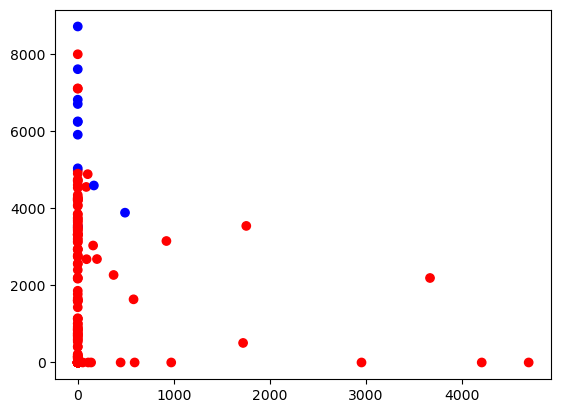

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(seleccion[1:200, 0], seleccion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Se puede ver cómo al representar las muestras respecto de estas dos variables, los casos de clientes que han contratado el producto se distinguen más fácilmente, ya que tienden a tener un valor alto en una de ellas (puntos azules). Por tanto, estas variables parecen ser buenas a la hora de distinguir casos positivos y negativos.

Cuando el proceso de modelización es costoso, reducir el número de variables puede ser de gran ayuda. Las técnicas de selección de variables se usan ampliamente en los procesos de análisis de datos y modelización.

## Transformación de variables

Es posible también realizar una transformación de variables, obteniendo combinaciones, normalmente lineales, de las variables originales que nos den mejores resultados al introducirlas en los modelos predictivos. SVD, PCA o ICA son algunos ejemplos:

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(variables._get_numeric_data())
print(pca.components_)
print(pca.explained_variance_ratio_)
transformacion = pca.transform(variables._get_numeric_data())

[[ 1.13272484e-05  2.49947982e-04  7.73521138e-05  3.07643903e-03
   9.98926227e-01  4.61104027e-02  4.83515690e-04  9.64832896e-05
  -5.79992186e-04  4.74753804e-04 -3.82916687e-05 -4.36431988e-04
   7.76395166e-04 -1.67202699e-04 -4.09448513e-04 -1.99807434e-04
   1.92596102e-03 -1.92596102e-03  8.38968477e-04 -8.38968477e-04
   1.45851838e-06  1.21989814e-04 -1.23418552e-04]
 [ 2.29104271e-05  9.00357437e-05  4.87987707e-04  1.41580431e-02
  -4.61751332e-02  9.98791715e-01  5.98078053e-05  7.42107667e-04
  -8.02017454e-04 -3.99451289e-04  1.67935439e-04  2.31606373e-04
   1.51812400e-03 -1.35632862e-03 -8.08457612e-04  6.46470913e-04
   5.99488232e-03 -5.99488232e-03  1.36589999e-03 -1.36589999e-03
  -3.22428480e-05 -3.69649764e-05  6.92457105e-05]
 [ 5.40217286e-04 -2.46878994e-05  1.66385989e-04  9.99876166e-01
  -2.43492037e-03 -1.43238167e-02  2.16244726e-03 -2.04578733e-05
  -2.14247137e-03  4.83553780e-04  1.64118780e-03 -2.12421051e-03
   9.03270170e-04  5.64289594e-04 -6.954

Veamos cómo queda representada una muestra del dataset respecto de las dos mejores variables sintéticas:

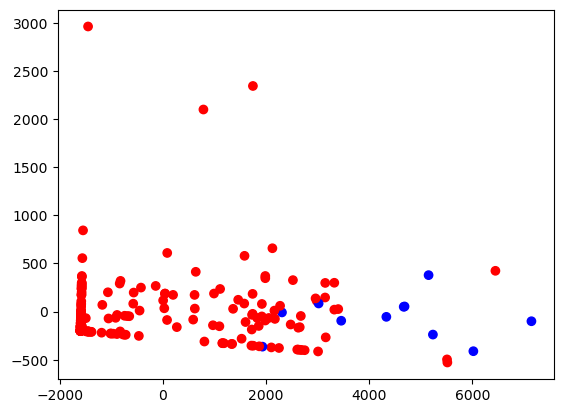

In [17]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(transformacion[1:200, 0], transformacion[1:200, 1], c=targets[1:200], cmap=cm_bright)
plt.show()

Como en el caso anterior, se puede ver que los casos positivos se pueden separar más fácilmente de los negativos al quedar la mayoría de ellos a la derecha de la gráfica.

Es habitual que las variables sintéticas generadas con métodos como PCA sean incluso mejores que las mejores variables seleccionadas con otras técnicas. Como contrapartida, el cálculo de estas variables es costoso y suele ser difícil darles un sentido de negocio.

¿Podrías probar varias técnicas de selección y transformación de variables? Ten en cuenta que no sólo es importante lo buenas que sean las variables finales para la predicción, sino también que el coste de calcularlas sea razonable y que seas capaz de explicar y justificar estas variables en caso de que el cliente lo solicite.

* http://scikit-learn.org/stable/modules/feature_selection.html
* http://scikit-learn.org/stable/modules/decomposition.html

##### A continuacion vamos a usar los siguientes metodos de transformacion de variables: Select Percentile, Umbral de Varianza, Recursive feature elimination with cross-validation, Singular Value Decomposition y Linear Discriminant Analysis.

### Select Percentile 

##### Este método se basa en la estadística y se utiliza para seleccionar un porcentaje determinado de las características más importantes, según algún criterio de evaluación específico. Este metodo evalúa cada característica individualmente y les asigna un puntaje según su relevancia en la tarea de aprendizaje. Luego, se selecciona un porcentaje determinado de las características con los puntajes más altos para su uso en el modelo de aprendizaje automático.

In [18]:
 from sklearn.feature_selection import SelectPercentile, chi2

In [19]:
variables_numericas = variables._get_numeric_data()
variables_numericas.shape

(2927, 23)

In [20]:
selector = SelectPercentile(chi2, percentile=15)
x_percentil = selector.fit_transform(variables_numericas, targets)

In [21]:
x_percentil.shape

(2927, 4)

In [22]:
variables_seleccionadas=variables_numericas.columns[selector.get_support()]
variables_seleccionadas

Index(['Gasto_Vida', 'Gasto_Vehiculos', 'Gasto_Otros', 'Educacion_Superior'], dtype='object')

##### Basándonos en estos resultados deducimos que el método Select Percentile, utilizando el criterio de evaluación de la prueba chi-cuadrado, seleccionó cuatro variables numéricas como las más importantes para la tarea de aprendizaje automático. Estas cuatro variables son "Gasto_Vida", "Gasto_Vehiculos", "Gasto_Otros" y "Educacion_Superior". El hecho de que solo cuatro variables hayan sido seleccionadas indica que el conjunto de datos puede tener una alta dimensionalidad, es decir, muchas variables que no son relevantes para la tarea de aprendizaje.

### Umbral de Varianza

#####  El método de umbral de varianza es una técnica de selección de características en el aprendizaje automático que se utiliza para seleccionar las características con una varianza por encima de un cierto umbral. La idea detrás de este método es que las características con baja varianza tienen poca información útil y no contribuyen significativamente a la variabilidad de los datos. Por lo tanto, estas características pueden eliminarse sin afectar demasiado la precisión del modelo. Es importante tener en cuenta que el método de umbral de varianza solo se puede aplicar a características numéricas, ya que la varianza se refiere a la dispersión de los valores numéricos.

In [23]:
from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=0.9)
thresholder=thresholder.fit(variables_numericas)
variables_seleccionadas=variables_numericas.columns[thresholder.get_support()]
print(variables_seleccionadas)

Index(['Productos_Otros', 'Gasto_Vida', 'Gasto_Vehiculos', 'Gasto_Otros',
       'Tipo_Familia', 'Tipo_Pareja', 'Tipo_Soltero', 'Educacion_Superior',
       'Educacion_Media', 'Educacion_Baja', 'Poblacion_Empresario',
       'Poblacion_Funcionario', 'Poblacion_Trabajador_Cualificado',
       'Poblacion_Trabajador_No_Cualificado', 'Vivienda_Propiedad',
       'Vivienda_Alquiler', 'Medico_Seguro_Privado', 'Medico_Seguridad_Social',
       'Ingresos_Mas_De_40000', 'Ingresos_De_20000_Hasta_40000',
       'Ingresos_Hasta_20000'],
      dtype='object')


In [24]:
len(variables_seleccionadas)

21

In [25]:
len(variables.columns)

28

##### Hemos reducido de 28 a 21 variables por lo que entendemos que este no es un buen metodo para nuestro caso. 

### Recursive feature elimination with cross-validation (REFCV)

##### Este método utiliza un algoritmo de aprendizaje automático para evaluar la importancia de cada característica del conjunto de datos y eliminar de forma iterativa las características menos importantes hasta que se alcanza un número de características deseado. A diferencia de la eliminación recursiva de características (RFE), RFECV utiliza validación cruzada para evaluar la calidad de cada conjunto de características y seleccionar el conjunto óptimo.

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

In [27]:
estimator = LogisticRegression(max_iter=10000)
selector = RFECV(
    estimator, 
    min_features_to_select=1,
    step=1, 
    cv=5
)

In [28]:
selector.rfecv = selector.fit(variables_numericas, targets)

In [29]:
print(selector.rfecv.support_)
print(selector.rfecv.ranking_)

[ True  True  True False  True False  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 4 1 3 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [30]:
columnas_seleccionadas = selector.rfecv.get_support(indices=True)
nombres_columnas_seleccionadas = variables_numericas.columns[columnas_seleccionadas]

In [31]:
print(nombres_columnas_seleccionadas)

Index(['Productos_Vida', 'Productos_Vehiculos', 'Productos_Otros',
       'Gasto_Vehiculos', 'Tipo_Familia', 'Tipo_Pareja', 'Tipo_Soltero',
       'Educacion_Media', 'Educacion_Baja', 'Poblacion_Empresario',
       'Poblacion_Funcionario', 'Poblacion_Trabajador_Cualificado',
       'Poblacion_Trabajador_No_Cualificado', 'Vivienda_Propiedad',
       'Vivienda_Alquiler', 'Medico_Seguro_Privado', 'Medico_Seguridad_Social',
       'Ingresos_Mas_De_40000', 'Ingresos_De_20000_Hasta_40000',
       'Ingresos_Hasta_20000'],
      dtype='object')


In [32]:
numero_caracteristicas =len(nombres_columnas_seleccionadas)
numero_caracteristicas

20

##### En este caso hemos reducido de 28 a 20 variables.  Calculando el RRFECV ha estado bastante mas tiempo que en los 2 anteriores porque lo que deducimos que en un modelo con un dataset mucho mas grande seria muy costoso. 

 ### Independent Component Analysis (ICA)

######  El ICA intenta encontrar una combinación lineal de las variables originales que permita separar las señales mezcladas y reconstruir las fuentes originales.  A diferencia de otros métodos de transformación de variables, como el PCA y el SVD, el ICA no busca encontrar las variables que expliquen la mayor varianza posible, sino que se enfoca en encontrar las señales independientes que contribuyen al conjunto de datos observado.

In [33]:
from sklearn.decomposition import FastICA

In [34]:
ica = FastICA(n_components=3)
ica.fit(variables._get_numeric_data())
print(ica.components_)
transformacion = ica.transform(variables._get_numeric_data())

C:\Users\Mara\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


[[ 1.64753185e-10 -2.14476117e-09  2.18726482e-10  4.19363826e-07
  -9.24469856e-06  1.32689118e-06 -3.41566609e-09  4.11007309e-10
   3.00421343e-09 -4.85242434e-09  1.34025947e-09  3.51227199e-09
  -4.07063077e-09 -6.12250156e-10  2.04033427e-09  2.64289968e-09
  -5.97725646e-09  5.97725646e-09 -4.83190847e-09  4.83190847e-09
  -1.93825401e-10 -1.15522940e-09  1.34885105e-09]
 [ 3.45699559e-08 -1.49514062e-09  1.09958692e-08  6.39632284e-05
  -1.09529351e-07 -2.01142117e-07  1.38392786e-07 -7.72310946e-10
  -1.37651376e-07  3.06815879e-08  1.05088297e-07 -1.35735850e-07
   5.89166332e-08  3.51131680e-08 -4.50886475e-08 -4.89250882e-08
   1.78302251e-07 -1.78302251e-07  7.09590939e-08 -7.09590939e-08
  -1.87482396e-08  4.32375609e-09  1.44249367e-08]
 [ 4.18229188e-10 -2.46010242e-09 -1.19585511e-08  1.49271135e-06
   5.10307939e-07 -2.50605030e-05  2.19152023e-09 -1.86781799e-08
   1.64883170e-08  1.05896689e-08 -1.14448789e-09 -9.44648441e-09
  -3.68335930e-08  3.51061269e-08  1.921

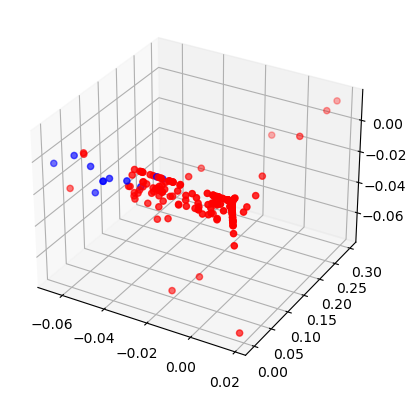

In [35]:
from mpl_toolkits.mplot3d import Axes3D
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = transformacion[1:200, 0]
y = transformacion[1:200, 1]
z = transformacion[1:200, 2]
c = targets[1:200]
ax.scatter(x, y, z, c=c, cmap=cm_bright)
plt.show()


### Linear Discriminant Analysis (LDA)

###### El objetivo principal de este metodo es encontrar una combinación lineal de variables predictoras que permita separar o discriminar las clases o categorías de la variable respuesta de manera óptima. 

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
variables_numericas.shape

(2927, 23)

In [38]:
lda = LinearDiscriminantAnalysis()

In [39]:
x_lda=lda.fit_transform(variables_numericas,targets)
print(lda.explained_variance_ratio_)

[1.]


In [40]:
x_lda

array([[ 1.01946597],
       [ 0.53246885],
       [ 0.49469851],
       ...,
       [-1.10275929],
       [-1.60277915],
       [ 0.78154628]])

In [41]:
x_lda.shape

(2927, 1)

#####  Esto indica que el conjunto de datos se ha reducido a una dimensión. El valor de la proporción de varianza explicada es de 1, lo cual significa que toda la información contenida en las variables originales se encuentra en la nueva dimensión generada por el LDA. Esto puede deberse a que la separación entre las categorías en el conjunto de datos es muy clara y puede ser fácilmente identificada mediante el LDA.

## Entrenamiento del modelo

No es evidente cuál es el mejor tipo de modelo para resolver nuestro problema. Por lo tanto, empezaremos con los modelos más sencillos y estables, los modelos lineales. Si los resultados no son suficientemente buenos, probaremos modelos más complejos.

Utilizaremos las variables originales, seleccionadas o transformadas y estudiaremos medidas de calidad como la precisión y el "recall" para evaluar cada uno de los modelos. Para ello, dividiremos el conjunto de datos de entrenamiento de modo que los primeros 2000 patrones servirán para entrenar los modelos, y el resto para validar:

In [42]:
import numpy as np

from sklearn.metrics import classification_report

X_train = variables._get_numeric_data()[1:2000]
X_val = variables._get_numeric_data()[2001:]
y_train = targets[1:2000]
y_val = targets[2001:]

El primer modelo a probar serán la regresión logística:

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

logr = Pipeline([('std', StandardScaler()), ('lr', LogisticRegression())])
logr.fit(X_train, y_train)
print(classification_report(y_val, logr.predict(X_val)))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       825
        True       0.47      0.17      0.25        54

    accuracy                           0.94       879
   macro avg       0.71      0.58      0.61       879
weighted avg       0.92      0.94      0.92       879



Vemos que los modelos lineales tienden a clasificar los patrones de la clase minoritaria como pertenecientes a la clase mayoritaria, por lo que vamos a probar con modelos también sencillos pero no lineales, como árboles de decisión, con la esperanza de obtener mejores resultados:

In [87]:
from sklearn.tree import DecisionTreeClassifier

t = DecisionTreeClassifier()
t.fit(X_train, y_train)
print(classification_report(y_val, t.predict(X_val)))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96       825
        True       0.39      0.35      0.37        54

    accuracy                           0.93       879
   macro avg       0.67      0.66      0.66       879
weighted avg       0.92      0.93      0.92       879



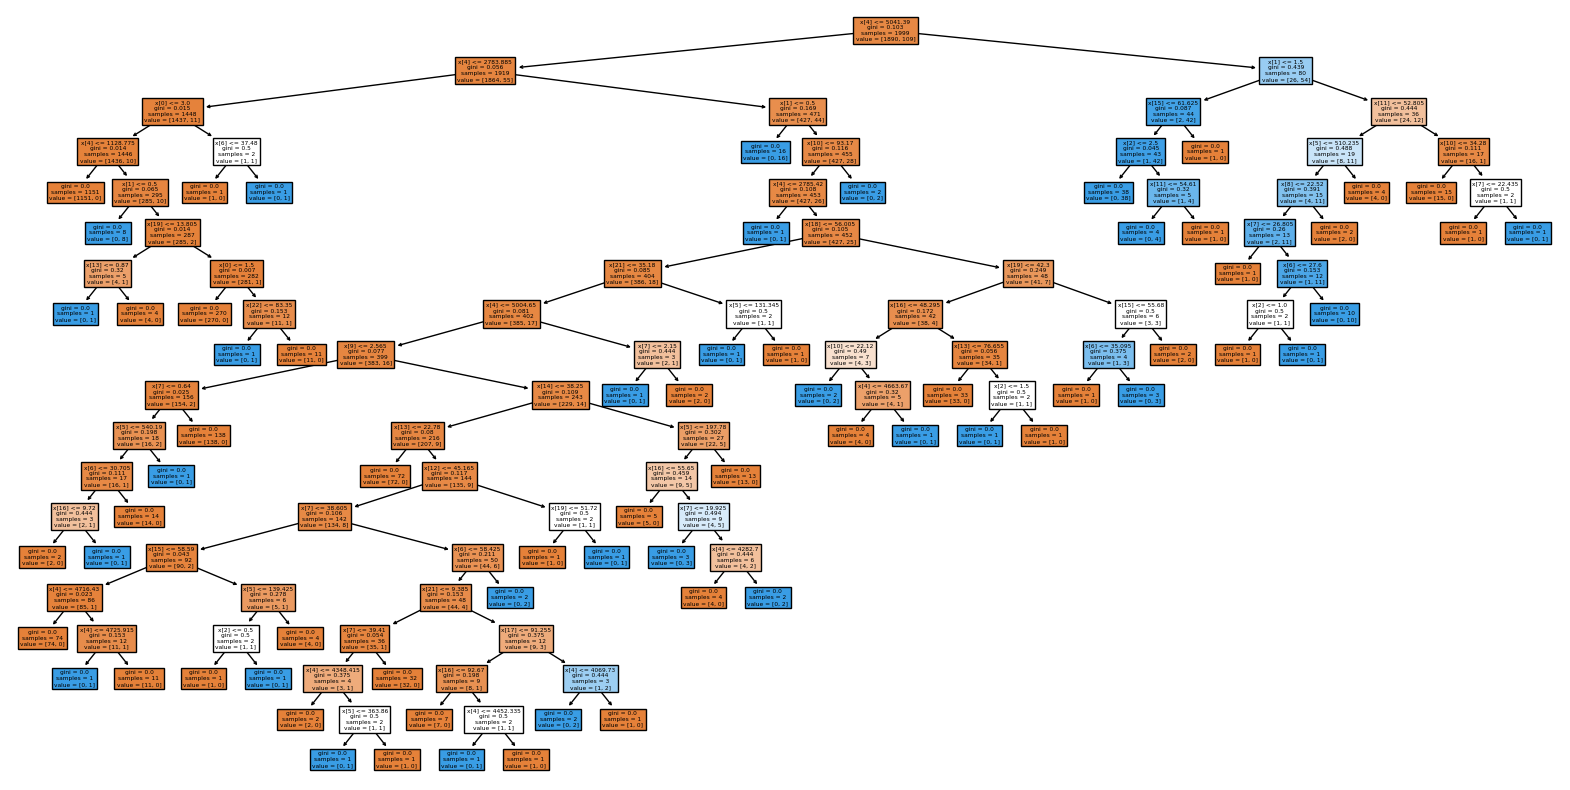

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(t, filled=True)
plt.show()

Elegir qué modelo utilizar y ajustarlo no es una tarea fácil. Habitualmente se prueban modelos sencillos y se va subiendo en complejidad si los resultados no son todo lo buenos que nos gustaría. La búsqueda de meta-parámetros es un proceso complejo que habitualmente necesita de cierta experiencia y conocimiento de los modelos.

Intenta mejorar los resultados vistos hasta ahora eligiendo alguno de los modelos e intentando ajustar sus meta-parámetros. Puedes probar a combinar técnicas de selección o transformación de variables con los modelos predictivos, con la ayuda de los pipelines de Scikit-learn.

* http://scikit-learn.org/stable/modules/linear_model.html
* http://scikit-learn.org/stable/modules/neural_network.html
* http://scikit-learn.org/stable/modules/tree.html
* http://scikit-learn.org/stable/modules/svm.html
* http://en.wikipedia.org/wiki/Precision_and_recall

In [68]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, roc_curve, auc


### Support Vector Classifier

In [107]:
def train_model(X_train, y_train, X_val, y_val, n_components=2, C=5, kernel='rbf'):

    pca = PCA(n_components=n_components)
    scaler = StandardScaler()
    svc = SVC(C=C, kernel=kernel, probability=True)

    pipeline = Pipeline([
        ('pca', pca),
        ('scaler', scaler),
        ('svc', svc)
    ])

    pipeline.fit(X_train, y_train)


    y_pred = pipeline.predict(X_val)
    report = classification_report(y_val, y_pred)

    return pipeline, report


In [108]:
pipeline, report = train_model(X_train, y_train, X_val, y_val, n_components=3, C=10, kernel='linear')
print(report)


              precision    recall  f1-score   support

       False       0.94      1.00      0.97       825
        True       0.00      0.00      0.00        54

    accuracy                           0.94       879
   macro avg       0.47      0.50      0.48       879
weighted avg       0.88      0.94      0.91       879



C:\Users\Mara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### La precisión y recall para la clase positiva son más altos que los modelos anteriores (Logistic Regression y Decision Tree Classifier), lo que indica que este modelo está siendo más efectivo en identificar correctamente los casos positivos. El f1-score para la clase positiva también es más alto.

### Random Forest 

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc = Pipeline([('std', StandardScaler()), ('rfc', RandomForestClassifier(n_estimators=10, min_samples_split=6))])
rfc.fit(X_train, y_train)

print(classification_report(y_val, rfc.predict(X_val)))

              precision    recall  f1-score   support

       False       0.96      0.99      0.98       825
        True       0.72      0.43      0.53        54

    accuracy                           0.95       879
   macro avg       0.84      0.71      0.76       879
weighted avg       0.95      0.95      0.95       879



###### La precisión y recall para la clase positiva son más altos que los modelos anteriores, lo que indica que este modelo está siendo más efectivo en identificar correctamente los casos positivos. El f1-score para la clase positiva también es más alto.

### XGBoost 

In [ ]:
import xgboost as xgb

In [71]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

params = {
    'max_depth': 5,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

model = xgb.train(params, dtrain, num_boost_round=100)

y_pred = model.predict(dtest)
y_pred_proba = model.predict(dtest, output_margin=True)

y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

print(classification_report(y_val, y_pred_binary))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       825
        True       0.59      0.31      0.41        54

    accuracy                           0.94       879
   macro avg       0.77      0.65      0.69       879
weighted avg       0.93      0.94      0.94       879



###### La precisión y recall para la clase positiva son más altos que los modelos anteriores, lo que indica que este modelo está siendo más efectivo en identificar correctamente los casos positivos. El f1-score para la clase positiva también es más alto.

### Multi-layer Perceptron Classifier.

In [72]:
from sklearn.neural_network import MLPClassifier


In [73]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       825
        True       0.48      0.20      0.29        54

    accuracy                           0.94       879
   macro avg       0.71      0.59      0.63       879
weighted avg       0.92      0.94      0.93       879



###### El modelo Multi-layer Perceptron classifier tiene una precisión de 0.27 en la clase positiva, lo que indica que puede haber problemas en la clasificación de los casos verdaderos positivos. Además, el recall de la clase positiva es de 0.70, lo que indica que el modelo es capaz de identificar la mayoría de los casos positivos, aunque también está clasificando incorrectamente algunos casos negativos como positivos

##### Despues de entrerar nuestro modelo con esos distintos metodos llegamos a la conclusion de que:

##### - Los modelos Logistic Regression, Support Vector Classifier, Decision Tree Classifier y Multi-layer Perceptron classifier tienen una precisión bastante baja para la clase True en comparación con los otros modelos.
##### - El modelo DecisionTreeClassifier tiene una precisión bastante baja para ambas clases (True y False).
##### - El modelo Random Forest  y XGBoost  tienen un buen rendimiento en términos de precisión, recall y f1-score para ambas clases.

##### El modelo con mayor recall para la clase positiva es el modelo Random Forest, seguido por XGBoost. El modelo con el mejor f1-score para la clase positiva es el modelo Random Forest.

## Evaluación del modelo

Ya vimos en el apartado anterior algunos indicadores de la calidad del modelo. También podemos utilizar gráficas como la curva precisión-recall o la curva ROC:

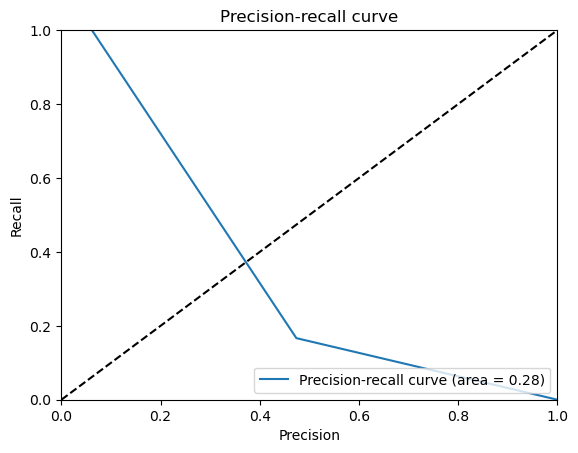

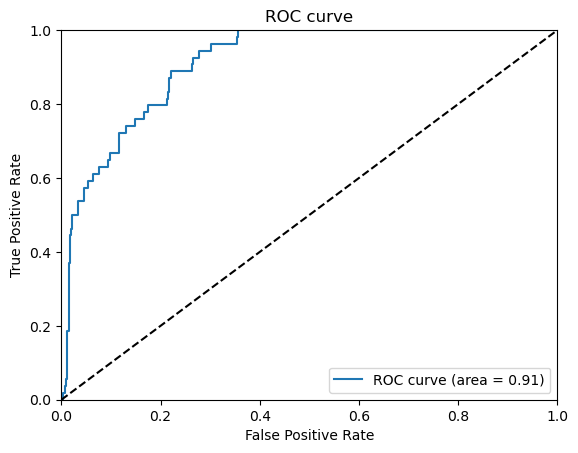

In [74]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(y_val, logr.predict(X_val))
pr_auc = auc(precision, recall)
plt.figure()
plt.plot(precision, recall, label='Precision-recall curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")
plt.show()

fpr, tpr, thresholds = roc_curve(y_val, logr.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Es muy habitual utilizar estas gráficas, especialmente la curva ROC, para decidir si los resultados son satisfactorios. Cuanto mayor sea el área que queda bajo la curva, mejores son los resultados del modelo que estamos probando.

Utiliza gráficas (estas u otras que puedas encontrar útiles) para hacer una valoración final de los resultados. Razona las conclusiones.

* http://scikit-learn.org/stable/modules/model_evaluation.html
* http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

##### Curva Roc de SVC

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

C:\Users\Mara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mara\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


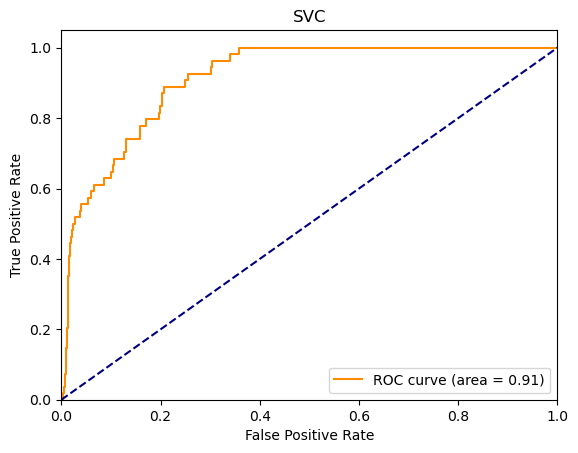

In [90]:
    y_pred = pipeline.predict(X_val)
    y_prob = pipeline.predict_proba(X_val)[:, 1]
    report = classification_report(y_val, y_pred)

    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)

 
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVC')
    plt.legend(loc="lower right")
    plt.show()


#### Curva ROC Decission Tree

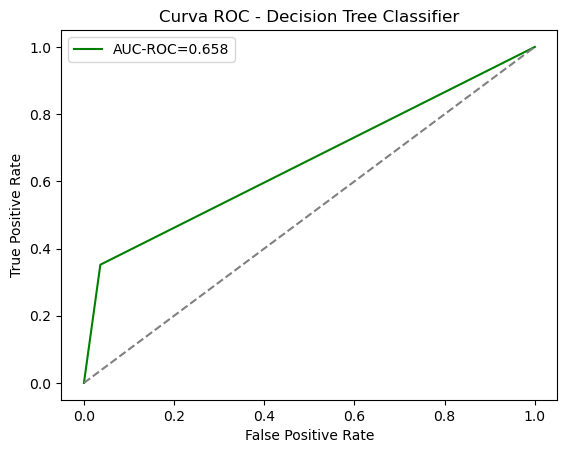

In [95]:
y_proba = t.predict_proba(X_val)[:, 1]

auc_roc = roc_auc_score(y_val, y_proba)
fpr, tpr, _ = roc_curve(y_val, y_proba)

plt.plot(fpr, tpr, label='AUC-ROC={:.3f}'.format(auc_roc), color='green')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Decision Tree Classifier')
plt.legend()
plt.show()


##### Curva Roc de Random Forest

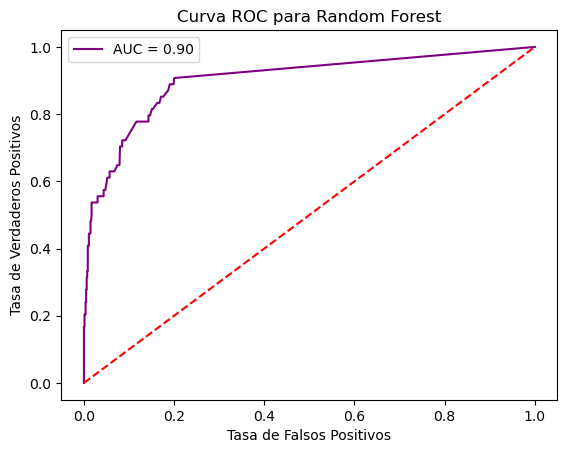

In [111]:
y_proba = rfc.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_proba)


auc_score = roc_auc_score(y_val, y_proba)


plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='purple')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Random Forest')
plt.legend()
plt.show()


##### Curva ROC de  XGBoost

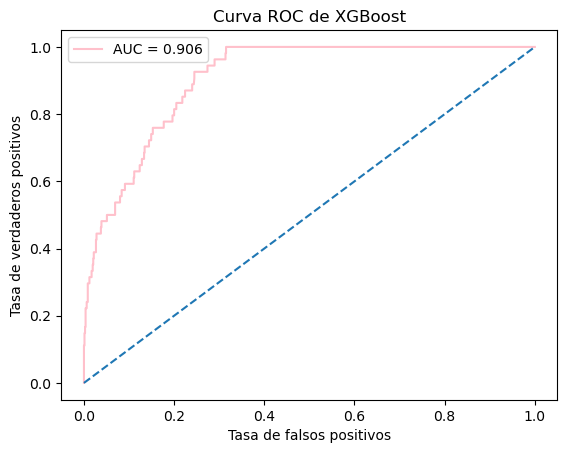

In [99]:
y_prob = model.predict(dtest)

fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = roc_auc_score(y_val, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}', color='pink')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC de XGBoost')
plt.legend()
plt.show()


#### Curva Roc Multi-layer Perceptron classifier.

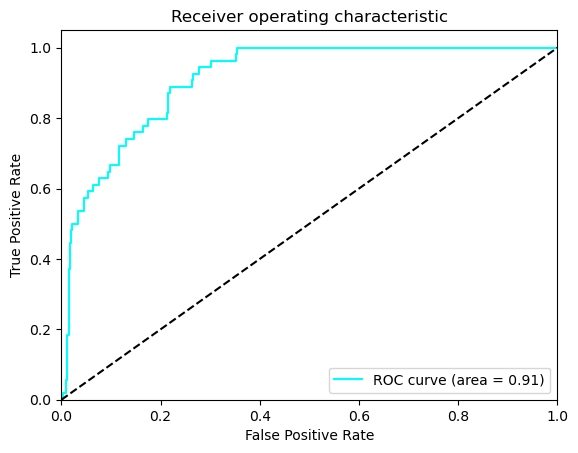

In [103]:
y_pred_proba = mlp.predict_proba(X_val)[:,1]

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = roc_auc_score(y_val, y_pred_proba)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color='cyan')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()



##### Como viamos en el entrenamiento, el Modelo XGBoost y el Random Forest son los que tiene mas area debajo de la curva ROC. 

##### Tenemos una diferencia en la grafica de Multi-layer Perceptron classifier pero debemos tener en cuenta que la precisión del modelo para la clase minoritaria (True) es baja (0.27), lo que indica que el modelo puede estar clasificando erróneamente muchos puntos de esa clase como negativos (False). Por lo tanto, aunque la curva ROC sugiere que el modelo tiene una buena capacidad de discriminación, debemos considerar el equilibrio entre la precisión y el recall para ambas clases.

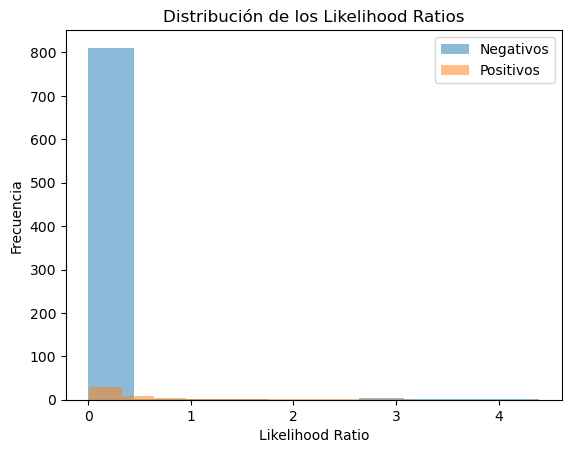

In [104]:
y_prob = mlp.predict_proba(X_val)[:,1]

class_likelihood_ratios = y_prob / (1 - y_prob)

import matplotlib.pyplot as plt
plt.hist(class_likelihood_ratios[y_val==0], alpha=0.5, label='Negativos')
plt.hist(class_likelihood_ratios[y_val==1], alpha=0.5, label='Positivos')
plt.xlabel('Likelihood Ratio')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Likelihood Ratios')
plt.legend()
plt.show()


#####  Entendemos que no hay suficientes valores positivos en los datos de validación para mostrar una barra significativa en el gráfico por eso el Grafico ROC no es util en este caso. 